In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score,precision_score,f1_score, confusion_matrix,roc_auc_score,classification_report
from sklearn.multiclass import BaseEstimator
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,VotingClassifier
pd.set_option('display.max_columns', None)
import os 
import sys
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
path="../../Data/"
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.data_cleaning import processing_functions as pfs
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from src.data_cleaning import useful_viz
path="../../Data/"

In [2]:
df = pd.read_csv('../../Data/training_set_values.csv',dtype={"permit":"object","public_meeting":"object"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [3]:
useful_viz.js_drop_unnecessary_feature_columns(df)

,funder,gps_height,installer,longitude,latitude,basin,region,region_code,district_code,lga,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type
0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,11,5,Ludewa,109,True,VWC,False,1999,gravity,vwc,pay annually,soft,enough,spring,communal standpipe
1,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,20,2,Serengeti,280,NaN,Other,True,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe
2,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,21,4,Simanjiro,250,True,VWC,True,2009,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple
3,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,90,63,Nanyumbu,58,True,VWC,True,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple
4,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,18,1,Karagwe,0,True,NaN,True,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,Germany Republi,1210,CES,37.169807,-3.253847,Pangani,Kilimanjaro,3,5,Hai,125,True,Water Board,True,1999,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe
59396,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Rufiji,Iringa,11,4,Njombe,56,True,VWC,True,1996,gravity,vwc,pay annually,soft,enough,river,communal standpipe
59397,NaN,0,NaN,34.017087,-8.750434,Rufiji,Mbeya,12,7,Mbarali,0,True,VWC,False,0,swn 80,vwc,pay monthly,fluoride,enough,machine dbh,hand pump
59398,Malec,0,Musa,35.861315,-6.378573,Rufiji,Dodoma,1,4,Chamwino,0,True,VWC,True,0,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump


In [4]:
height_mean=df[df.gps_height>0]
g_height=height_mean.gps_height.mean()
g_height

1060.341803234933

In [5]:
df.gps_height.replace(0,g_height,inplace=True)

In [6]:
df.gps_height

0        1390.000000
1        1399.000000
2         686.000000
3         263.000000
4        1060.341803
            ...     
59395    1210.000000
59396    1212.000000
59397    1060.341803
59398    1060.341803
59399     191.000000
Name: gps_height, Length: 59400, dtype: float64

In [7]:
median_year=df[df.construction_year>0]
median_year
g_year=median_year.construction_year.median()#seems reasonable
median_year
g_year

2000.0

In [8]:
h_year=median_year.construction_year.median()#seems reasonable
h_year

2000.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF014D3F40>]],
      dtype=object)

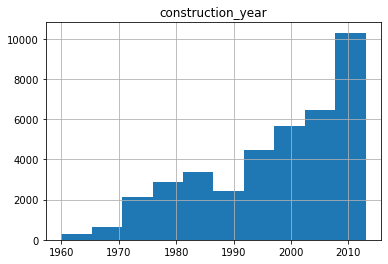

In [9]:
median_year.hist(column="construction_year")

In [10]:
df.construction_year.replace(0,2000,inplace=True)

Knn for these values instead, Multiples columns with onehotencite temp df

In [11]:
df.construction_year

0        1999
1        2010
2        2009
3        1986
4        2000
         ... 
59395    1999
59396    1996
59397    2000
59398    2000
59399    2002
Name: construction_year, Length: 59400, dtype: int64

Lets try this binning thing out-Still working on binning these two colmuns installer and funder

In [12]:
temp_df=df.drop(["funder","installer"],axis=1)

In [13]:
temp_df=temp_df.fillna("unknown")

In [14]:
temp_df

,gps_height,longitude,latitude,basin,region,region_code,district_code,lga,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type
0,1390.000000,34.938093,-9.856322,Lake Nyasa,Iringa,11,5,Ludewa,109,True,VWC,False,1999,gravity,vwc,pay annually,soft,enough,spring,communal standpipe
1,1399.000000,34.698766,-2.147466,Lake Victoria,Mara,20,2,Serengeti,280,unknown,Other,True,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe
2,686.000000,37.460664,-3.821329,Pangani,Manyara,21,4,Simanjiro,250,True,VWC,True,2009,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple
3,263.000000,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,90,63,Nanyumbu,58,True,VWC,True,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple
4,1060.341803,31.130847,-1.825359,Lake Victoria,Kagera,18,1,Karagwe,0,True,unknown,True,2000,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,1210.000000,37.169807,-3.253847,Pangani,Kilimanjaro,3,5,Hai,125,True,Water Board,True,1999,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe
59396,1212.000000,35.249991,-9.070629,Rufiji,Iringa,11,4,Njombe,56,True,VWC,True,1996,gravity,vwc,pay annually,soft,enough,river,communal standpipe
59397,1060.341803,34.017087,-8.750434,Rufiji,Mbeya,12,7,Mbarali,0,True,VWC,False,2000,swn 80,vwc,pay monthly,fluoride,enough,machine dbh,hand pump
59398,1060.341803,35.861315,-6.378573,Rufiji,Dodoma,1,4,Chamwino,0,True,VWC,True,2000,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump


In [15]:
temp_df['binned_gpsheight'] = pd.cut(temp_df['gps_height'], bins = [ -90, 0, 1, 2770],labels=["below sufrace level",'at surface level', 'Above surface level'])
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gps_height         59400 non-null  float64 
 1   longitude          59400 non-null  float64 
 2   latitude           59400 non-null  float64 
 3   basin              59400 non-null  object  
 4   region             59400 non-null  object  
 5   region_code        59400 non-null  int64   
 6   district_code      59400 non-null  int64   
 7   lga                59400 non-null  object  
 8   population         59400 non-null  int64   
 9   public_meeting     59400 non-null  object  
 10  scheme_management  59400 non-null  object  
 11  permit             59400 non-null  object  
 12  construction_year  59400 non-null  int64   
 13  extraction_type    59400 non-null  object  
 14  management         59400 non-null  object  
 15  payment            59400 non-null  object  
 16  wate

In [16]:
convert_dict = {'binned_gpsheight': "object"} 
  
temp_df = temp_df.astype(convert_dict) 
print(temp_df.dtypes) 

gps_height           float64
longitude            float64
latitude             float64
basin                 object
region                object
region_code            int64
district_code          int64
lga                   object
population             int64
public_meeting        object
scheme_management     object
permit                object
construction_year      int64
extraction_type       object
management            object
payment               object
water_quality         object
quantity              object
source                object
waterpoint_type       object
binned_gpsheight      object
dtype: object


In [17]:
temp_df=temp_df.drop("gps_height",axis=1)
temp_df

,longitude,latitude,basin,region,region_code,district_code,lga,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,binned_gpsheight
0,34.938093,-9.856322,Lake Nyasa,Iringa,11,5,Ludewa,109,True,VWC,False,1999,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,Above surface level
1,34.698766,-2.147466,Lake Victoria,Mara,20,2,Serengeti,280,unknown,Other,True,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,Above surface level
2,37.460664,-3.821329,Pangani,Manyara,21,4,Simanjiro,250,True,VWC,True,2009,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,Above surface level
3,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,90,63,Nanyumbu,58,True,VWC,True,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,Above surface level
4,31.130847,-1.825359,Lake Victoria,Kagera,18,1,Karagwe,0,True,unknown,True,2000,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,Above surface level
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,37.169807,-3.253847,Pangani,Kilimanjaro,3,5,Hai,125,True,Water Board,True,1999,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe,Above surface level
59396,35.249991,-9.070629,Rufiji,Iringa,11,4,Njombe,56,True,VWC,True,1996,gravity,vwc,pay annually,soft,enough,river,communal standpipe,Above surface level
59397,34.017087,-8.750434,Rufiji,Mbeya,12,7,Mbarali,0,True,VWC,False,2000,swn 80,vwc,pay monthly,fluoride,enough,machine dbh,hand pump,Above surface level
59398,35.861315,-6.378573,Rufiji,Dodoma,1,4,Chamwino,0,True,VWC,True,2000,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump,Above surface level


In [18]:
temp_df.isnull().sum()

longitude            0
latitude             0
basin                0
region               0
region_code          0
district_code        0
lga                  0
population           0
public_meeting       0
scheme_management    0
permit               0
construction_year    0
extraction_type      0
management           0
payment              0
water_quality        0
quantity             0
source               0
waterpoint_type      0
binned_gpsheight     1
dtype: int64

In [19]:
temp_df, encoders=pfs.ohe_all_categorical_features(temp_df)
# encoded_temp2=pd.DataFrame(encoded_temp)
# temp_df.fillna("unknown")

In [20]:
temp_df

,longitude,latitude,region_code,population,construction_year,Internal,Lake Nyasa,Lake Rukwa,Lake Tanganyika,Lake Victoria,Pangani,Rufiji,Ruvuma / Southern Coast,Wami / Ruvu,Arusha,Dar es Salaam,Dodoma,Iringa,Kagera,Kigoma,Kilimanjaro,Lindi,Manyara,Mara,Mbeya,Morogoro,Mtwara,Mwanza,Pwani,Rukwa,Ruvuma,Shinyanga,Singida,Tabora,Tanga,Arusha Rural,Arusha Urban,Babati,Bagamoyo,Bahi,Bariadi,Biharamulo,Bukoba Rural,Bukoba Urban,Bukombe,Bunda,Chamwino,Chato,Chunya,Dodoma Urban,Geita,Hai,Hanang,Handeni,Igunga,Ilala,Ileje,Ilemela,Iramba,Iringa Rural,Kahama,Karagwe,Karatu,Kasulu,Kibaha,Kibondo,Kigoma Rural,Kigoma Urban,Kilindi,Kilolo,Kilombero,Kilosa,Kilwa,Kinondoni,Kisarawe,Kishapu,Kiteto,Kondoa,Kongwa,Korogwe,Kwimba,Kyela,Lindi Rural,Lindi Urban,Liwale,Longido,Ludewa,Lushoto,Mafia,Magu,Makete,Manyoni,Masasi,Maswa,Mbarali,Mbeya Rural,Mbinga,Mbozi,Mbulu,Meatu,Meru,Misenyi,Missungwi,Mkinga,Mkuranga,Monduli,Morogoro Rural,Morogoro Urban,Moshi Rural,Moshi Urban,Mpanda,Mpwapwa,Mtwara Rural,Mtwara Urban,Mufindi,Muheza,Muleba,Musoma Rural,Mvomero,Mwanga,Nachingwea,Namtumbo,Nanyumbu,Newala,Ngara,Ngorongoro,Njombe,Nkasi,Nyamagana,Nzega,Pangani,Rombo,Rorya,Ruangwa,Rufiji,Rungwe,Same,Sengerema,Serengeti,Shinyanga Rural,Shinyanga Urban,Siha,Sikonge,Simanjiro,Singida Rural,Singida Urban,Songea Rural,Songea Urban,Sumbawanga Rural,Sumbawanga Urban,Tabora Urban,Tandahimba,Tanga,Tarime,Temeke,Tunduru,Ukerewe,Ulanga,Urambo,Uyui,False,True,unknown,Company,None,Other,Parastatal,Private operator,SWC,Trust,VWC,WUA,WUG,Water Board,Water authority,unknown,False,True,unknown,afridev,cemo,climax,gravity,india mark ii,india mark iii,ksb,mono,nira/tanira,other,other - mkulima/shinyanga,other - play pump,other - rope pump,other - swn 81,submersible,swn 80,walimi,windmill,company,other,other - school,parastatal,private operator,trust,unknown,vwc,water authority,water board,wua,wug,never pay,other,pay annually,pay monthly,pay per bucket,pay when scheme fails,unknown,coloured,fluoride,fluoride abandoned,milky,salty,salty abandoned,soft,unknown,dry,enough,insufficient,seasonal,unknown,dam,hand dtw,lake,machine dbh,other,rainwater harvesting,river,shallow well,spring,unknown,cattle trough,communal standpipe,communal standpipe multiple,dam,hand pump,improved spring,other,Above surface level,at surface level,below sufrace level,nan,0,1,13,2,23,3,30,33,4,43,5,53,6,60,62,63,67,7,8,80
0,34.938093,-9.856322,11,109,1999,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,34.698766,-2.147466,20,280,2010,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [21]:
X=temp_df

In [22]:
target_df=pd.read_csv(path+'training_set_labels.csv')
target_df

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [23]:
target_df.status_group.value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [24]:
from sklearn.preprocessing import LabelEncoder
sle = LabelEncoder()
status_encoded = sle.fit_transform(target_df['status_group'])
status_df=pd.DataFrame(status_encoded)
status_encoded_map = {index: label for index, label in 
                                       enumerate(sle.classes_)}

In [25]:
status_encoded_map

{0: 'functional', 1: 'functional needs repair', 2: 'non functional'}

In [26]:
y=status_df

In [27]:
X_train,X_test,y_train,y_test= train_test_split(X,y, random_state=2020)

In [33]:
dt=DecisionTreeClassifier(class_weight="balanced",max_depth=5)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [34]:
dt_yhat=dt.predict(X_test)

In [35]:
dt_prob=dt.predict_proba(X_test)

In [36]:
dt.score(X_test,y_test)

0.518989898989899

In [37]:
print(classification_report(y_test,dt_yhat))

              precision    recall  f1-score   support

           0       0.68      0.56      0.61      8010
           1       0.15      0.72      0.25      1152
           2       0.92      0.42      0.58      5688

    accuracy                           0.52     14850
   macro avg       0.58      0.57      0.48     14850
weighted avg       0.73      0.52      0.57     14850



Comparing traning and test metrics to better choose params, cross val with rf/bagging,gridsearch on rf/bagging, circle back on features

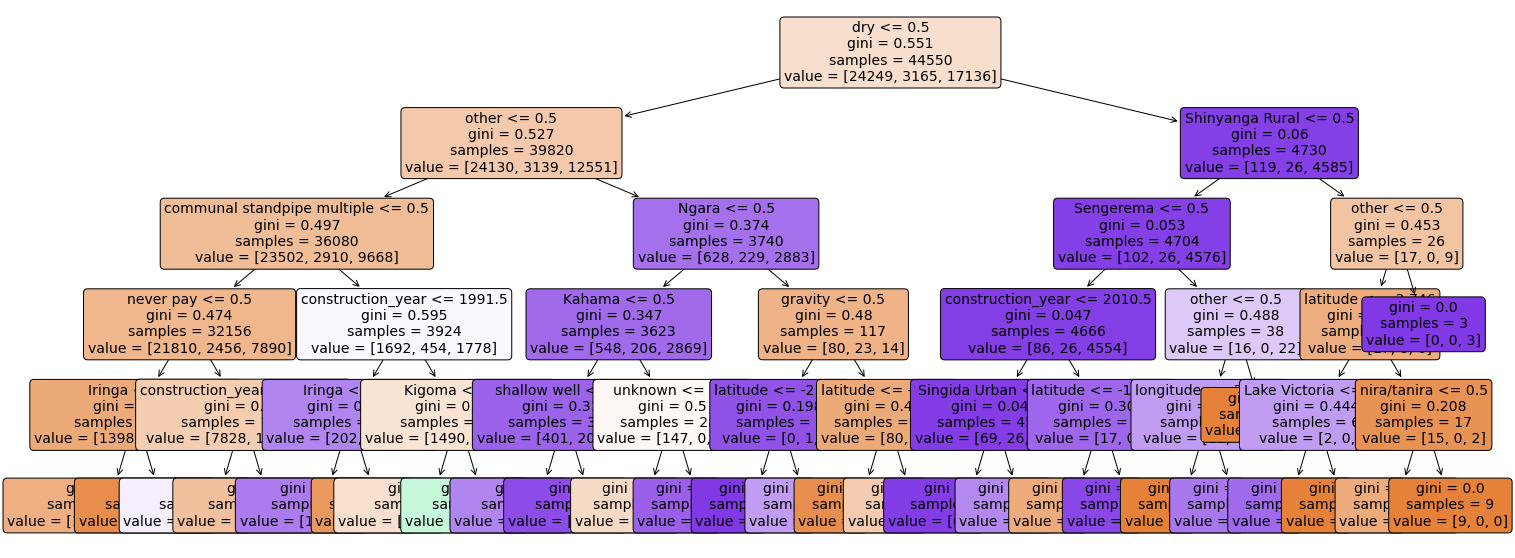

In [162]:
useful_viz.show_tree(dt,X_train);

Want to try a dictionary of class and value to manipualte more

In [38]:
rf=RandomForestClassifier(class_weight="balanced_subsample",min_samples_split=3,min_samples_leaf=1,max_features=15)
rf.fit(X_train,y_train)

<ipython-input-38-4061e15c9d72>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestClassifier(class_weight='balanced_subsample', max_features=15,
                       min_samples_split=3)

In [39]:
rf.score(X_test,y_test)

0.7997979797979798

In [40]:
dt_yhat=rf.predict(X_test)

In [41]:
print(classification_report(y_test,dt_yhat))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      8010
           1       0.52      0.44      0.47      1152
           2       0.83      0.78      0.80      5688

    accuracy                           0.80     14850
   macro avg       0.72      0.69      0.71     14850
weighted avg       0.80      0.80      0.80     14850



In [42]:
rf_yhat=rf.predict(X_test)

In [43]:
rf_prob=rf.predict_proba(X_test)

In [44]:
print(classification_report(y_test,dt_yhat))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      8010
           1       0.52      0.44      0.47      1152
           2       0.83      0.78      0.80      5688

    accuracy                           0.80     14850
   macro avg       0.72      0.69      0.71     14850
weighted avg       0.80      0.80      0.80     14850



In [45]:
rf.score(X_test,y_test)

0.7997979797979798

In [46]:
rf_prob=rf_prob.reshape(1,-1)

In [47]:
print(classification_report(y_test,rf_yhat))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      8010
           1       0.52      0.44      0.47      1152
           2       0.83      0.78      0.80      5688

    accuracy                           0.80     14850
   macro avg       0.72      0.69      0.71     14850
weighted avg       0.80      0.80      0.80     14850



In [49]:
bg=BaggingClassifier(n_estimators=15)
bg.fit(X_train,y_train)

C:\Users\jstep\anaconda3\envs\Tanzania\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


BaggingClassifier(n_estimators=15)

In [50]:
bg_yhat=bg.predict(X_test)

In [51]:
print(classification_report(y_test,bg_yhat))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      8010
           1       0.53      0.36      0.42      1152
           2       0.81      0.77      0.79      5688

    accuracy                           0.79     14850
   macro avg       0.71      0.66      0.68     14850
weighted avg       0.78      0.79      0.78     14850



In [52]:
bg.score(X_test,y_test)

0.7890909090909091

In [53]:
adb=AdaBoostClassifier()
adb.fit(X_train,y_train)

C:\Users\jstep\anaconda3\envs\Tanzania\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoostClassifier()

In [54]:
abd_yhat=adb.predict(X_test)

In [55]:
print(classification_report(y_test,abd_yhat))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78      8010
           1       0.57      0.09      0.16      1152
           2       0.76      0.61      0.68      5688

    accuracy                           0.72     14850
   macro avg       0.68      0.53      0.54     14850
weighted avg       0.71      0.72      0.69     14850



In [56]:
adb.score(X_test,y_test)

0.7164309764309764

In [57]:
gas=GaussianNB()
gas.fit(X_train,y_train)

C:\Users\jstep\anaconda3\envs\Tanzania\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [58]:
gas.score(X_test,y_test)

0.4105723905723906

In [59]:
gasyhat=gas.predict(X_test)

In [60]:
print(classification_report(y_test,gasyhat))

              precision    recall  f1-score   support

           0       0.76      0.31      0.44      8010
           1       0.13      0.87      0.23      1152
           2       0.68      0.45      0.54      5688

    accuracy                           0.41     14850
   macro avg       0.53      0.55      0.40     14850
weighted avg       0.68      0.41      0.47     14850

